In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import timeit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [2]:
#show the shape of dataset
data=pd.read_csv("MLF_GP1_CreditScore.csv")
X=data.iloc[:,0:26]
y=data.iloc[:,26]
z=data.iloc[:,27]
print("Number of explanatory variables:",X.shape[1])
print("Number of observations:",X.shape[0])
print('Binary target:\n',y.value_counts())
print('Multiclass target:\n',z.value_counts())

Number of explanatory variables: 26
Number of observations: 1700
Binary target:
 1    1287
0     413
Name: InvGrd, dtype: int64
Multiclass target:
 Baa2    326
Baa3    232
Baa1    179
Aa3     174
A2      156
Ba2     125
A1      122
Ba3     108
B1       69
Aa2      65
B2       48
B3       37
A3       31
Ba1      17
Caa1      9
Aaa       2
Name: Rating, dtype: int64


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
Sales/Revenues              1700 non-null float64
Gross Margin                1700 non-null float64
EBITDA                      1700 non-null float64
EBITDA Margin               1700 non-null float64
Net Income Before Extras    1700 non-null float64
Total Debt                  1700 non-null float64
Net Debt                    1700 non-null float64
LT Debt                     1700 non-null float64
ST Debt                     1700 non-null float64
Cash                        1700 non-null float64
Free Cash Flow              1700 non-null float64
Total Debt/EBITDA           1700 non-null float64
Net Debt/EBITDA             1700 non-null float64
Total MV                    1700 non-null float64
Total Debt/MV               1700 non-null float64
Net Debt/MV                 1700 non-null float64
CFO/Debt                    1700 non-null float64
CFO                         1700 non-null f

In [4]:
data.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,-0.312325,0.731197,-0.819863,0.092043,1.270202,-0.398624,-0.165088,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,8.895136,12.280493,22.002550,0.385111,22.797054,41.235876,6.277606,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,-238.750000,-0.910486,-495.355952,-0.871567,-0.939190,-781.502439,-172.654240,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,-0.527219,-0.134477,-0.181621,-0.113241,-0.206442,-0.267345,-0.211115,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,-0.058475,-0.012302,-0.034452,0.066836,-0.018464,-0.032055,0.012847,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,0.396581,0.141443,0.163697,0.236566,0.242868,0.274710,0.251992,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,125.785869,256.050232,360.926171,3.961121,676.443064,1352.088710,15.821709,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


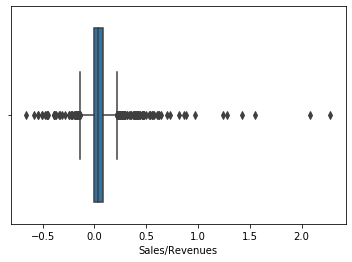

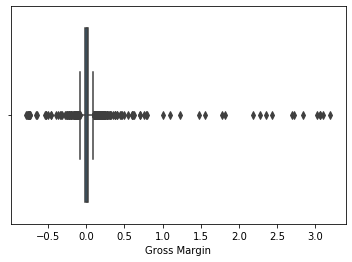

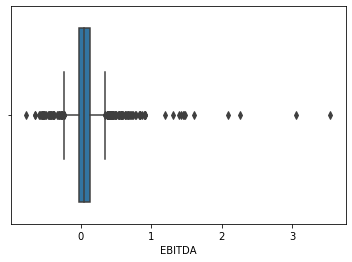

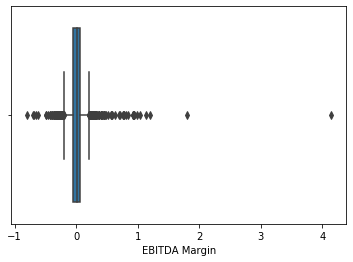

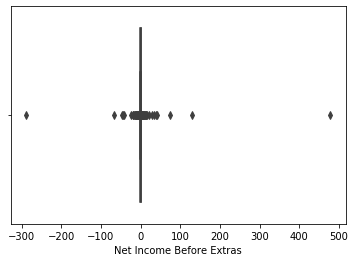

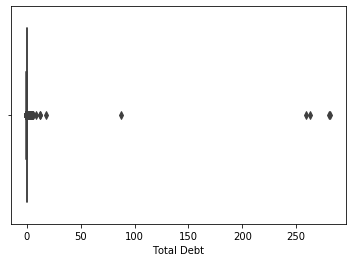

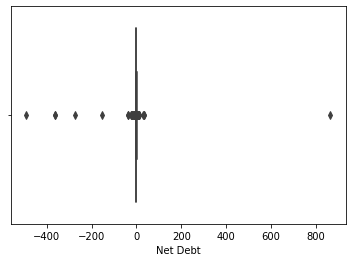

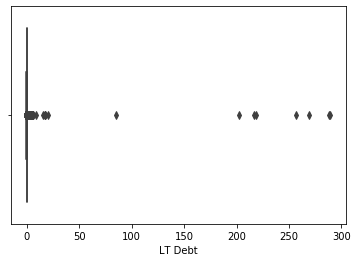

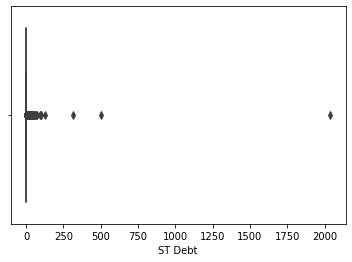

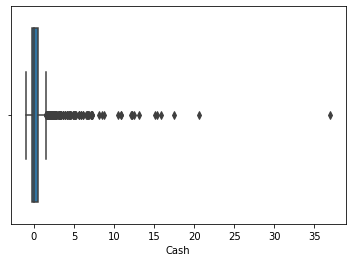

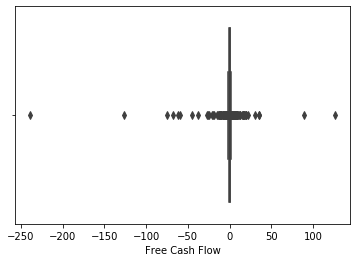

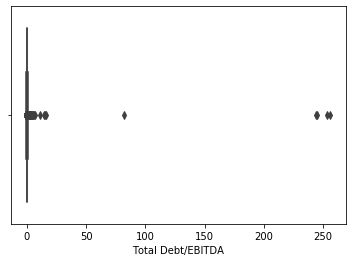

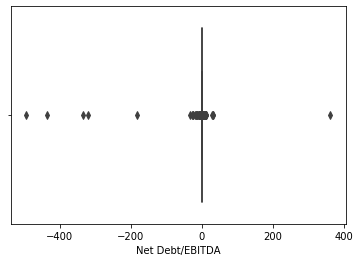

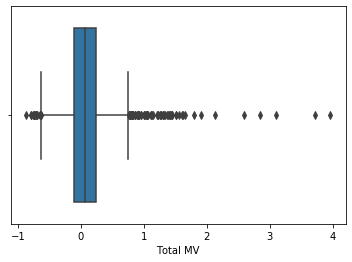

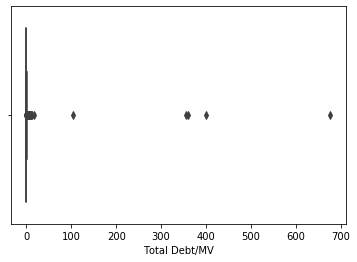

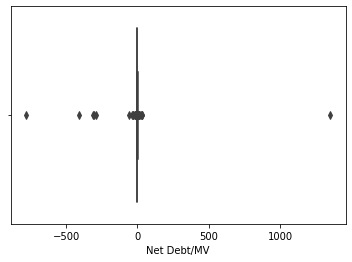

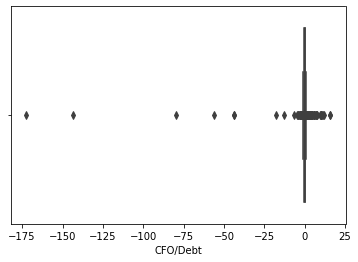

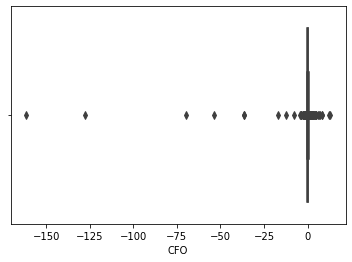

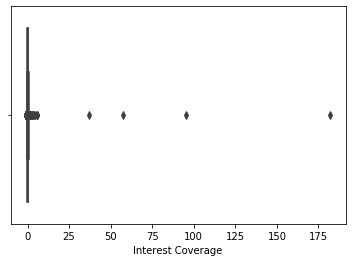

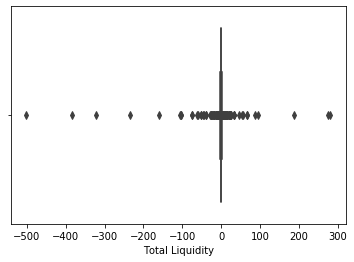

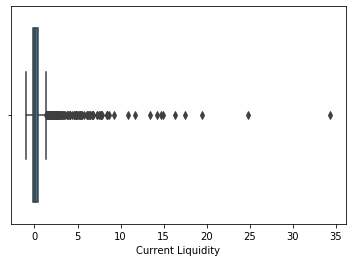

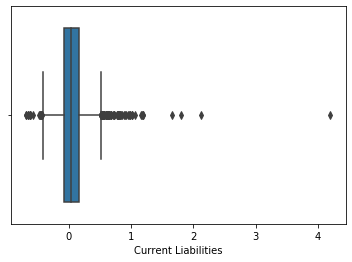

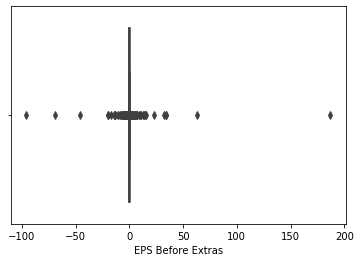

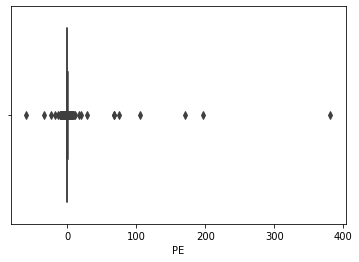

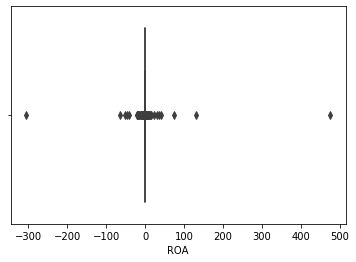

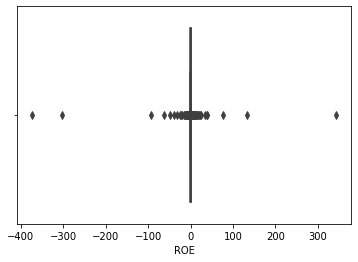

In [5]:
#boxplot
for i in range(X.shape[1]):
    sns.boxplot(X.iloc[:,i])
    plt.show()
#OUTILIERS EVERYWHERE!

In [6]:
#Find Outliers by z_score>3 and remove them
data1=data.drop('Rating',axis=1)
z_score = np.abs(stats.zscore(data1))
data1_clean=data1[(z_score < 3).all(axis=1)]
data1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1699
Data columns (total 27 columns):
Sales/Revenues              1490 non-null float64
Gross Margin                1490 non-null float64
EBITDA                      1490 non-null float64
EBITDA Margin               1490 non-null float64
Net Income Before Extras    1490 non-null float64
Total Debt                  1490 non-null float64
Net Debt                    1490 non-null float64
LT Debt                     1490 non-null float64
ST Debt                     1490 non-null float64
Cash                        1490 non-null float64
Free Cash Flow              1490 non-null float64
Total Debt/EBITDA           1490 non-null float64
Net Debt/EBITDA             1490 non-null float64
Total MV                    1490 non-null float64
Total Debt/MV               1490 non-null float64
Net Debt/MV                 1490 non-null float64
CFO/Debt                    1490 non-null float64
CFO                         1490 non-null f

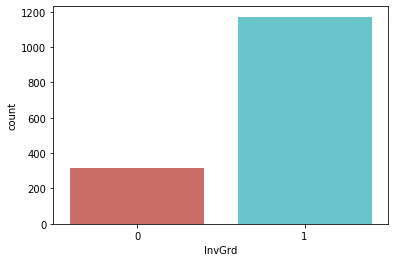

In [7]:
sns.countplot(x="InvGrd",data=data1_clean,palette='hls')
plt.show()

In [8]:
#we control the standard deviation of each explanatory varibles under 6 
data1_clean.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,0.042263,-0.001492,0.051588,0.009810,-0.047453,0.082516,0.087979,0.130475,1.358539,0.279097,-0.003718,0.048500,0.059856,0.067386,0.108469,0.106603,0.124349,0.074012,0.082857,-0.301347,0.242690,0.063360,-0.036023,-0.111231,-0.105211,0.003186,0.786577
std,0.095362,0.096042,0.143446,0.111404,1.615528,0.381356,2.040433,0.930168,7.011943,0.857948,2.589731,0.423938,1.972440,0.280595,0.599918,2.161357,1.315598,0.954841,0.454105,5.799334,0.877274,0.207665,1.445744,1.993491,1.632103,2.295222,0.409861
min,-0.395213,-0.762091,-0.582113,-0.493612,-16.873684,-0.903014,-23.825792,-0.921515,-0.997692,-0.970799,-25.482759,-0.910486,-24.122430,-0.871567,-0.939190,-39.864278,-17.908443,-17.123479,-0.893159,-62.097561,-0.976823,-0.619742,-17.181819,-33.361312,-18.975145,-24.563479,0.000000
25%,-0.003667,-0.019147,-0.022492,-0.040552,-0.126306,-0.072012,-0.112552,-0.089990,-0.335910,-0.186474,-0.465509,-0.123835,-0.161360,-0.102324,-0.193499,-0.244505,-0.190390,-0.105946,-0.085101,-0.833454,-0.210460,-0.065387,-0.104167,-0.267663,-0.165552,-0.196571,1.000000
50%,0.033437,0.002889,0.044052,0.011329,0.062334,0.008339,0.001186,-0.002654,0.045448,0.075153,-0.040386,-0.011091,-0.026057,0.066505,-0.017837,-0.022037,0.022885,0.048084,0.044850,-0.212382,0.044614,0.041466,0.072321,-0.035841,-0.002155,-0.012876,1.000000
75%,0.077721,0.023032,0.118849,0.057349,0.213403,0.129598,0.160495,0.156018,0.647172,0.457305,0.397757,0.122488,0.154126,0.217426,0.219046,0.265184,0.248605,0.210127,0.168364,0.502395,0.393503,0.157433,0.234018,0.155963,0.153782,0.201400,1.000000
max,0.533449,0.794361,0.732799,0.583550,20.981729,5.008340,31.994186,19.792007,126.476191,5.873939,21.569767,6.944804,31.716120,1.230911,7.627107,29.652727,15.821709,13.005788,5.968977,57.000000,6.061359,0.858790,15.541667,28.090905,22.647653,38.864125,1.000000


In [9]:
#correlation matrix
corr_mat=pd.DataFrame(data1_clean.corr())
corr_mat

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
Sales/Revenues,1.000000,-0.146639,0.598572,-0.084764,0.064885,0.157687,0.041465,-0.011106,0.035404,0.042342,0.009302,-0.098822,-0.010947,0.117238,0.068980,0.020603,0.092214,0.134951,0.043786,0.022196,-0.081790,0.386954,0.110296,0.031675,0.037496,-0.011930,-0.085116
Gross Margin,-0.146639,1.000000,0.153761,0.331703,0.045677,-0.058948,-0.028639,-0.046724,-0.017589,0.006033,0.015289,-0.125115,-0.040543,0.112280,-0.111413,-0.034850,0.008555,-0.027183,0.139317,-0.050336,0.010070,0.009098,0.024911,-0.002563,0.048762,0.033657,-0.015231
EBITDA,0.598572,0.153761,1.000000,0.738838,0.206019,0.058890,-0.019423,-0.038480,-0.002959,0.056158,0.093868,-0.330319,-0.093918,0.297677,-0.122869,-0.045053,0.137925,0.173709,0.292790,0.019859,-0.023948,0.233108,0.205098,0.056500,0.180330,0.110022,-0.037729
EBITDA Margin,-0.084764,0.331703,0.738838,1.000000,0.195649,-0.061077,-0.058633,-0.043266,-0.029811,0.033089,0.107909,-0.334420,-0.109197,0.268638,-0.210093,-0.075647,0.095206,0.099561,0.326449,0.007393,0.036808,-0.023031,0.167333,0.052926,0.190605,0.143670,0.031080
Net Income Before Extras,0.064885,0.045677,0.206019,0.195649,1.000000,-0.002324,-0.005580,-0.012233,-0.000943,-0.020692,0.024463,-0.085526,-0.022681,0.110572,-0.085262,-0.025623,0.068372,0.085892,0.103349,-0.005193,-0.031376,0.038411,0.887934,0.070466,0.989242,0.735266,0.070249
Total Debt,0.157687,-0.058948,0.058890,-0.061077,-0.002324,1.000000,0.177594,0.764595,0.166592,-0.005419,-0.032403,0.888657,0.186398,-0.041368,0.677042,0.168530,-0.285446,-0.047824,-0.248817,0.009435,-0.048659,0.263059,0.020150,0.018442,-0.012339,0.024386,0.005349
Net Debt,0.041465,-0.028639,-0.019423,-0.058633,-0.005580,0.177594,1.000000,0.168252,-0.023712,-0.039709,-0.026937,0.169686,0.987359,-0.011147,0.106862,0.929257,0.010828,-0.006379,-0.033813,-0.002949,-0.046154,0.048168,-0.001147,0.007855,-0.011100,-0.009374,0.008688
LT Debt,-0.011106,-0.046724,-0.038480,-0.043266,-0.012233,0.764595,0.168252,1.000000,-0.016884,0.004207,-0.038443,0.801110,0.205477,-0.031832,0.519848,0.166375,-0.125672,-0.015978,-0.067079,-0.024958,0.070494,-0.095866,-0.001103,0.021596,-0.015232,0.014363,0.017357
ST Debt,0.035404,-0.017589,-0.002959,-0.029811,-0.000943,0.166592,-0.023712,-0.016884,1.000000,-0.000151,0.067186,0.147574,-0.029824,-0.022149,0.132375,-0.040716,-0.030168,0.006695,-0.019558,-0.015935,-0.076649,0.339670,0.002379,0.016428,-0.001109,-0.000661,-0.007762
Cash,0.042342,0.006033,0.056158,0.033089,-0.020692,-0.005419,-0.039709,0.004207,-0.000151,1.000000,0.032820,-0.021900,-0.043550,0.034416,-0.017130,-0.034752,0.121848,0.114725,0.025973,0.046224,0.940130,0.038871,-0.011405,-0.094877,-0.039543,-0.047417,-0.102295


AxesSubplot(0.125,0.1925;0.62x0.62)


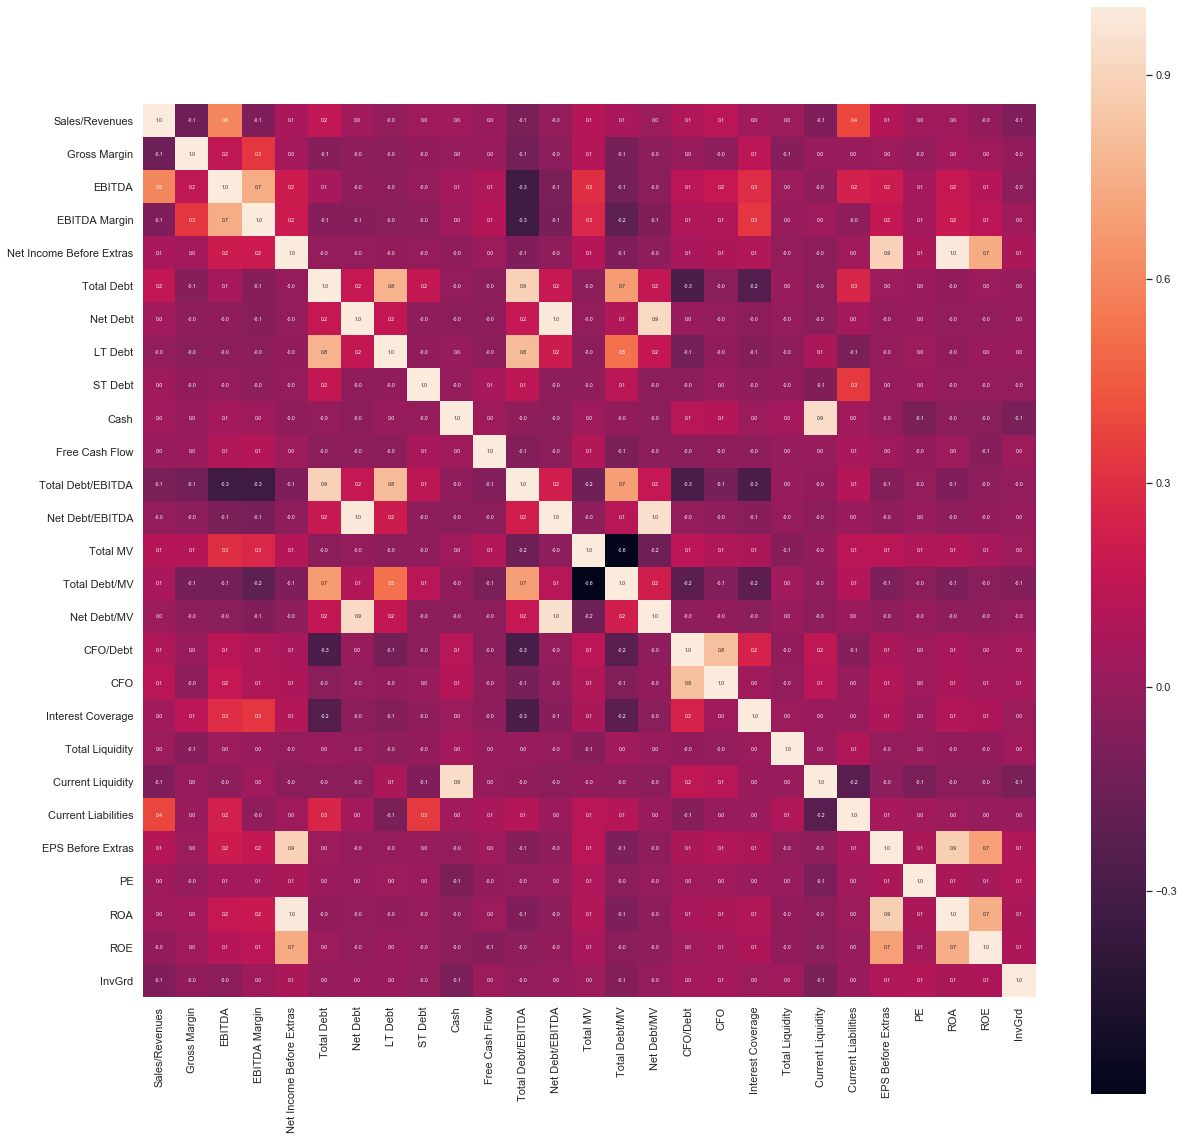

In [10]:
#heatmap
figure(figsize=(20,20))
cm=np.corrcoef(data1_clean.values.T)
sns.set(font_scale=1)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size':5},yticklabels=data1_clean.columns,xticklabels=data1_clean.columns)
print(hm)

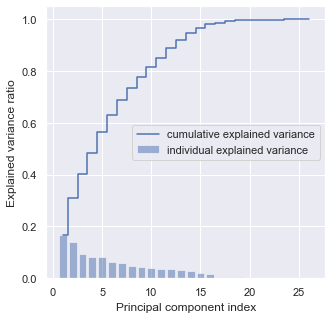

The cumulative explained variance ratio of the 3 component pca model is:
 [0.16874587 0.30911593 0.401495   0.48530903 0.56587406 0.62957684
 0.68674882 0.73399738 0.77658904 0.81566748 0.85263069 0.88825822
 0.92043792 0.94717589 0.96609129 0.98070496 0.98716933 0.99235949
 0.9959253  0.99700944 0.99788104 0.99865323 0.99930598 0.99971186
 0.99989723 1.        ]


In [11]:
#PCA
X=data1_clean.iloc[:,0:26]
y=data1_clean.iloc[:,26]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,random_state=20)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
model=PCA(n_components=None)
X_train_pca=model.fit_transform(X_train_std)
X_test_pca=model.transform(X_test_std)
cov_mat = np.cov(X_train_pca.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
figure(figsize=(5,5))
plt.bar(range(1,27), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,27), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()
print("The cumulative explained variance ratio of the 3 component pca model is:\n", cum_var_exp)

In [12]:
#We transform the cleaned dataset by the PCA with 15 principal components
pca = PCA(n_components=15) 
X_train_15pca = pca.fit_transform(X_train_std) 
X_test_15pca = pca.transform(X_test_std) 

In [13]:
#fit the logistic regression on the PCA transformed dataset
logreg = LogisticRegression(solver='lbfgs') 
logreg.fit(X_train_pca, y_train)  
y_pred_logreg = logreg.predict(X_test_pca)
print('Accuracy of logistic regression classifier on train set: {:.10f}'.format(logreg.score(X_train_pca, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.10f}'.format(logreg.score(X_test_pca, y_test)))
print(classification_report(y_test, y_pred_logreg))

Accuracy of logistic regression classifier on train set: 0.7978187919
Accuracy of logistic regression classifier on test set: 0.7785234899
              precision    recall  f1-score   support

           0       0.83      0.07      0.13        70
           1       0.78      1.00      0.87       228

    accuracy                           0.78       298
   macro avg       0.81      0.53      0.50       298
weighted avg       0.79      0.78      0.70       298



In [14]:
#fit the SVM on the transformed dataset
svm = SVC(gamma='scale',probability=True)
svm.fit(X_train_pca, y_train)  
y_pred_svm = svm.predict(X_test_pca)
print('Accuracy of support vector classifier on train set: {:.10f}'.format(svm.score(X_train_pca, y_train)))
print('Accuracy of support vector classifier on test set: {:.10f}'.format(svm.score(X_test_pca, y_test)))
print(classification_report(y_test, y_pred_svm))

Accuracy of support vector classifier on train set: 0.8699664430
Accuracy of support vector classifier on test set: 0.7919463087
              precision    recall  f1-score   support

           0       0.75      0.17      0.28        70
           1       0.79      0.98      0.88       228

    accuracy                           0.79       298
   macro avg       0.77      0.58      0.58       298
weighted avg       0.78      0.79      0.74       298



In [15]:
#fit the DecisionTreeClassifier on the transformed dataset
dt=DecisionTreeClassifier(random_state=1)
dt.fit(X_train_pca, y_train)  
y_pred_dt = dt.predict(X_test_pca)
print('Accuracy of DecisionTreeClassifier on train set: {:.10f}'.format(dt.score(X_train_pca, y_train)))
print('Accuracy of DecisionTreeClassifier on test set: {:.10f}'.format(dt.score(X_test_pca, y_test)))
print(classification_report(y_test, y_pred_dt))

Accuracy of DecisionTreeClassifier on train set: 1.0000000000
Accuracy of DecisionTreeClassifier on test set: 0.7818791946
              precision    recall  f1-score   support

           0       0.55      0.40      0.46        70
           1       0.83      0.90      0.86       228

    accuracy                           0.78       298
   macro avg       0.69      0.65      0.66       298
weighted avg       0.76      0.78      0.77       298



In [16]:
#fit the K-NeighborsClassifier on the transformed dataset
knn = KNeighborsClassifier()
knn.fit(X_train_pca,y_train)
y_pred_knn = knn.predict(X_test_pca)
print('Accuracy of K-Neighbors Classifier on train set: {:.10f}'.format(knn.score(X_train_pca, y_train)))
print('Accuracy of K-Neighbors Classifier on test set: {:.10f}'.format(knn.score(X_test_pca, y_test)))
print(classification_report(y_test, y_pred_knn))

Accuracy of K-Neighbors Classifier on train set: 0.8934563758
Accuracy of K-Neighbors Classifier on test set: 0.7785234899
              precision    recall  f1-score   support

           0       0.58      0.20      0.30        70
           1       0.80      0.96      0.87       228

    accuracy                           0.78       298
   macro avg       0.69      0.58      0.58       298
weighted avg       0.75      0.78      0.73       298



In [17]:
#Hence, we can make a conclusion that the support vector classifier has the best performance in the test set so we will 
#optimize its hyperparameters.

In [18]:
#hyperparameter tuning
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher_svm = GridSearchCV(svm, parameters,cv=10)
searcher_svm.fit(X_train_pca, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher_svm.best_params_)
print("Train accuracy of best grid search hypers:{:.10f}".format(searcher_svm.score(X_train_pca, y_train)))
print("Test accuracy of best grid search hypers:{:.10f}".format(searcher_svm.score(X_test_pca, y_test)))

Best CV params {'C': 10, 'gamma': 0.1}
Train accuracy of best grid search hypers:0.9714765101
Test accuracy of best grid search hypers:0.8590604027


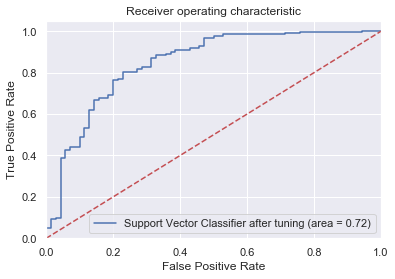

Accuracy of Support Vector Classifier on train set after tuning: 0.9714765101
Accuracy of Support Vector Classifier on test set after tuning: 0.8590604027


In [19]:
svm_tuning = SVC(C=10,gamma=0.1,probability=True) 
svm_tuning.fit(X_train_pca,y_train)  
y_pred_svm_tuning = svm_tuning.predict(X_test_pca)
svm_roc_auc_tuning = roc_auc_score(y_test, y_pred_svm_tuning)
fpr, tpr, thresholds = roc_curve(y_test, svm_tuning.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Classifier after tuning (area = %0.2f)' % svm_roc_auc_tuning)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVC_ROC_tuning')
plt.show()
print('Accuracy of Support Vector Classifier on train set after tuning: {:.10f}'.format(svm_tuning.score(X_train_pca, y_train)))
print('Accuracy of Support Vector Classifier on test set after tuning: {:.10f}'.format(svm_tuning.score(X_test_pca, y_test)))

In [20]:
#ensemble by AdaBoost classifier
for i in [10,50,100,200,400]: 
    ada = AdaBoostClassifier(base_estimator=svm_tuning, n_estimators=i,random_state=1)
    ada.fit(X_train_pca, y_train)
    y_pred_proba = ada.predict_proba(X_test_pca)[:,1]
    ada_roc_auc = roc_auc_score(y_test,y_pred_proba)
    print('ROC AUC score: {:.10f}'.format(ada_roc_auc))

ROC AUC score: 0.8194862155
ROC AUC score: 0.8263157895
ROC AUC score: 0.8263157895
ROC AUC score: 0.8263157895
ROC AUC score: 0.8263157895


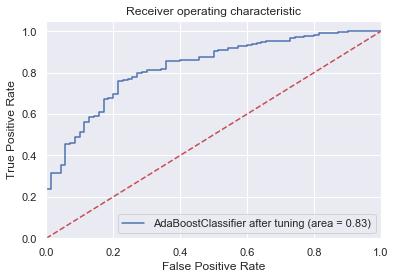

Accuracy of AdaBoost Classifier on train set after tuning: 0.7919463087
Accuracy of AdaBoost Classifier on test set after tuning: 0.7651006711


C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.77      1.00      0.87       228

    accuracy                           0.77       298
   macro avg       0.38      0.50      0.43       298
weighted avg       0.59      0.77      0.66       298

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [21]:
ada_tuning = AdaBoostClassifier(base_estimator=svm_tuning, n_estimators=50,random_state=1)
ada_tuning.fit(X_train_pca,y_train)  
y_pred_proba_tuning = ada_tuning.predict_proba(X_test_pca)[:,1]
ada_roc_auc_tuning = roc_auc_score(y_test, y_pred_proba_tuning)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tuning)
plt.figure()
plt.plot(fpr, tpr, label='AdaBoostClassifier after tuning (area = %0.2f)' % ada_roc_auc_tuning)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ADA_ROC_tuning')
plt.show()
print('Accuracy of AdaBoost Classifier on train set after tuning: {:.10f}'.format(ada_tuning.score(X_train_pca, y_train)))
print('Accuracy of AdaBoost Classifier on test set after tuning: {:.10f}'.format(ada_tuning.score(X_test_pca, y_test)))
print(classification_report(y_test, ada_tuning.predict(X_test_pca)))
print(ada_tuning.predict(X_test_pca))

In [22]:
#Ensemble SVM by Bagging Classifier
for i in [10,50,100,200,400]: 
    bag_svm = BaggingClassifier(base_estimator = svm_tuning , n_estimators= i , random_state=1)
    bag_svm.fit(X_train_pca, y_train)
    y_pred_proba_bag = bag_svm.predict_proba(X_test_pca)[:,1]
    bag_roc_auc = roc_auc_score(y_test,y_pred_proba_bag)
    print('ROC AUC score: {:.10f}'.format(bag_roc_auc))

ROC AUC score: 0.8360275689
ROC AUC score: 0.8395363409
ROC AUC score: 0.8395363409
ROC AUC score: 0.8394110276
ROC AUC score: 0.8381578947


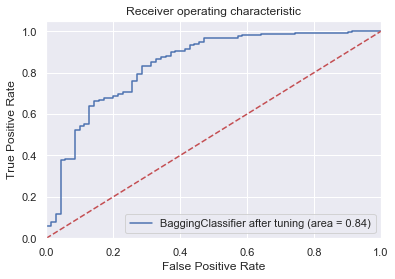

Accuracy of Bagging Classifier on train set after tuning: 0.9630872483
Accuracy of Bagging Classifier on test set after tuning: 0.8255033557
              precision    recall  f1-score   support

           0       0.88      0.30      0.45        70
           1       0.82      0.99      0.90       228

    accuracy                           0.83       298
   macro avg       0.85      0.64      0.67       298
weighted avg       0.83      0.83      0.79       298



In [23]:
bag_tuning = BaggingClassifier(base_estimator=svm_tuning, n_estimators=100,random_state=1)
bag_tuning.fit(X_train_pca,y_train)  
y_pred_proba_tuning_bag = bag_tuning.predict_proba(X_test_pca)[:,1]
bag_roc_auc_tuning = roc_auc_score(y_test, y_pred_proba_tuning_bag)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tuning_bag)
plt.figure()
plt.plot(fpr, tpr, label='BaggingClassifier after tuning (area = %0.2f)' % bag_roc_auc_tuning)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('BAG_ROC_tuning')
plt.show()
print('Accuracy of Bagging Classifier on train set after tuning: {:.10f}'.format(bag_tuning.score(X_train_pca, y_train)))
print('Accuracy of Bagging Classifier on test set after tuning: {:.10f}'.format(bag_tuning.score(X_test_pca, y_test)))
print(classification_report(y_test, bag_tuning.predict(X_test_pca)))

In [24]:
#Conclusin: Hence, Bagging Classifier based on SVMs has the best performance on the data.

In [25]:
#Multiclass classification
i=list(data1_clean.index.values)
z=z[i]
data2_clean = pd.concat([data1_clean.drop(['InvGrd'], axis=1), z], axis=1, sort=False)
data2_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1699
Data columns (total 27 columns):
Sales/Revenues              1490 non-null float64
Gross Margin                1490 non-null float64
EBITDA                      1490 non-null float64
EBITDA Margin               1490 non-null float64
Net Income Before Extras    1490 non-null float64
Total Debt                  1490 non-null float64
Net Debt                    1490 non-null float64
LT Debt                     1490 non-null float64
ST Debt                     1490 non-null float64
Cash                        1490 non-null float64
Free Cash Flow              1490 non-null float64
Total Debt/EBITDA           1490 non-null float64
Net Debt/EBITDA             1490 non-null float64
Total MV                    1490 non-null float64
Total Debt/MV               1490 non-null float64
Net Debt/MV                 1490 non-null float64
CFO/Debt                    1490 non-null float64
CFO                         1490 non-null f

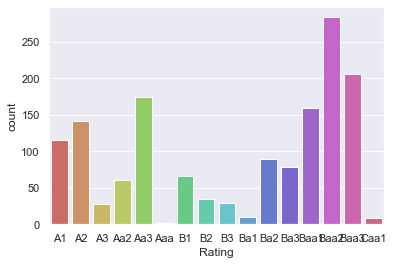

In [26]:
# sns.countplot(x="Rating",data=data2_clean,palette='hls')
# plt.show()
sns.countplot(x="Rating",data=data2_clean,palette='hls')
plt.show()

In [27]:
#train-test-split
X_mul=data2_clean.iloc[:,0:26]
y_mul=data2_clean.iloc[:,26]
X_train_mul, X_test_mul, y_train_mul, y_test_mul =train_test_split(X_mul, y_mul, test_size=0.2,random_state=20)
sc = StandardScaler()
X_train_std1 = sc.fit_transform(X_train_mul)
X_test_std1 = sc.transform(X_test_mul)
pca = PCA(n_components=15) 
X_train_15pca1 = pca.fit_transform(X_train_std1) 
X_test_15pca1 = pca.transform(X_test_std1) 

In [28]:
#fit the logistic regression on the multiclasses model
logreg1 = LogisticRegression(solver='lbfgs',multi_class="auto",max_iter=1000) 
logreg1.fit(X_train_15pca1, y_train_mul)
y_pred_logreg1 = logreg1.predict(X_test_15pca1)
print('Accuracy of logistic regression classifier on train set: {:.10f}'.format(logreg1.score(X_train_15pca1, y_train_mul)))
print('Accuracy of logistic regression classifier on test set: {:.10f}'.format(logreg1.score(X_test_15pca1, y_test_mul)))
print(classification_report(y_test_mul, y_pred_logreg1))

Accuracy of logistic regression classifier on train set: 0.2667785235
Accuracy of logistic regression classifier on test set: 0.2013422819
              precision    recall  f1-score   support

          A1       0.00      0.00      0.00        21
          A2       0.11      0.09      0.10        22
          A3       1.00      0.43      0.60         7
         Aa2       0.00      0.00      0.00        16
         Aa3       0.38      0.08      0.13        39
          B1       0.00      0.00      0.00        15
          B2       1.00      0.12      0.22         8
          B3       0.20      0.08      0.12        12
         Ba1       0.00      0.00      0.00         4
         Ba2       0.24      0.21      0.22        19
         Ba3       0.00      0.00      0.00        11
        Baa1       0.25      0.03      0.05        36
        Baa2       0.18      0.76      0.30        45
        Baa3       0.22      0.26      0.24        42
        Caa1       0.00      0.00      0.00       

C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
#fit the SVM on the transformed dataset
svm1 = SVC(gamma='auto',probability=True)
svm1.fit(X_train_15pca1, y_train_mul)  
y_pred_svm_mul = svm1.predict(X_test_15pca1)
print('Accuracy of support vector classifier on train set: {:.10f}'.format(svm1.score(X_train_15pca1, y_train_mul)))
print('Accuracy of support vector classifier on test set: {:.10f}'.format(svm1.score(X_test_15pca1, y_test_mul)))
print(classification_report(y_test_mul, y_pred_svm_mul))

Accuracy of support vector classifier on train set: 0.5377516779
Accuracy of support vector classifier on test set: 0.3255033557
              precision    recall  f1-score   support

          A1       0.57      0.19      0.29        21
          A2       0.50      0.27      0.35        22
          A3       1.00      0.29      0.44         7
         Aa2       0.00      0.00      0.00        16
         Aa3       0.28      0.64      0.39        39
          B1       1.00      0.07      0.12        15
          B2       0.75      0.38      0.50         8
          B3       0.00      0.00      0.00        12
         Ba1       0.00      0.00      0.00         4
         Ba2       0.41      0.37      0.39        19
         Ba3       1.00      0.09      0.17        11
        Baa1       0.67      0.11      0.19        36
        Baa2       0.26      0.69      0.38        45
        Baa3       0.33      0.31      0.32        42
        Caa1       0.00      0.00      0.00         1

    a

C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
#fit the DecisionTreeClassifier on the transformed dataset
dt1=DecisionTreeClassifier(random_state=1)
dt1.fit(X_train_15pca1, y_train_mul)  
y_pred_dt_mul = dt1.predict(X_test_15pca1)
print('Accuracy of DecisionTreeClassifier on train set: {:.10f}'.format(dt1.score(X_train_15pca1, y_train_mul)))
print('Accuracy of DecisionTreeClassifier on test set: {:.10f}'.format(dt1.score(X_test_15pca1, y_test_mul)))
print(classification_report(y_test_mul, y_pred_dt_mul))

Accuracy of DecisionTreeClassifier on train set: 1.0000000000
Accuracy of DecisionTreeClassifier on test set: 0.2919463087
              precision    recall  f1-score   support

          A1       0.18      0.19      0.19        21
          A2       0.12      0.14      0.13        22
          A3       0.33      0.29      0.31         7
         Aa2       0.46      0.38      0.41        16
         Aa3       0.35      0.36      0.35        39
          B1       0.25      0.20      0.22        15
          B2       0.33      0.25      0.29         8
          B3       0.25      0.17      0.20        12
         Ba1       0.00      0.00      0.00         4
         Ba2       0.31      0.21      0.25        19
         Ba3       0.08      0.09      0.08        11
        Baa1       0.25      0.28      0.26        36
        Baa2       0.33      0.42      0.37        45
        Baa3       0.40      0.40      0.40        42
        Caa1       0.00      0.00      0.00         1

    accurac

C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
#fit the K-NeighborsClassifier on the transformed dataset
knn1 = KNeighborsClassifier()
knn1.fit(X_train_15pca1, y_train_mul)
y_pred_knn_mul = knn1.predict(X_test_15pca1)
print('Accuracy of K-Neighbors Classifier on train set: {:.10f}'.format(knn1.score(X_train_15pca1, y_train_mul)))
print('Accuracy of K-Neighbors Classifier on test set: {:.10f}'.format(knn1.score(X_test_15pca1, y_test_mul)))
print(classification_report(y_test_mul, y_pred_knn_mul))

Accuracy of K-Neighbors Classifier on train set: 0.6258389262
Accuracy of K-Neighbors Classifier on test set: 0.3590604027
              precision    recall  f1-score   support

          A1       0.34      0.48      0.40        21
          A2       0.20      0.32      0.25        22
          A3       0.50      0.29      0.36         7
         Aa2       0.44      0.44      0.44        16
         Aa3       0.44      0.64      0.52        39
          B1       0.25      0.07      0.11        15
          B2       0.33      0.25      0.29         8
          B3       0.00      0.00      0.00        12
         Ba1       0.00      0.00      0.00         4
         Ba2       0.38      0.26      0.31        19
         Ba3       0.33      0.09      0.14        11
        Baa1       0.36      0.33      0.35        36
        Baa2       0.35      0.49      0.41        45
        Baa3       0.38      0.31      0.34        42
        Caa1       0.00      0.00      0.00         1

    accurac

C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
#Since KNN classifier has better performance, we choose it to do the hyperparameters tuning
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_15pca1, y_train_mul)
# Report the best parameters and the corresponding score
print("Best CV params", grid.best_params_)
print("Train accuracy of best grid search hypers:{:.10f}".format(grid.score(X_train_15pca1, y_train_mul)))
print("Test accuracy of best grid search hypers:{:.10f}".format(grid.score(X_test_15pca1, y_test_mul)))

C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best CV params {'n_neighbors': 1, 'weights': 'uniform'}
Train accuracy of best grid search hypers:1.0000000000
Test accuracy of best grid search hypers:0.5335570470


C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
#tuning
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_15pca1, y_train_mul)
y_pred_knn_mul = knn1.predict(X_test_15pca1)
print('Accuracy of K-Neighbors Classifier on train set: {:.10f}'.format(knn1.score(X_train_15pca1, y_train_mul)))
print('Accuracy of K-Neighbors Classifier on test set: {:.10f}'.format(knn1.score(X_test_15pca1, y_test_mul)))
print(classification_report(y_test_mul, y_pred_knn_mul))

Accuracy of K-Neighbors Classifier on train set: 1.0000000000
Accuracy of K-Neighbors Classifier on test set: 0.5335570470
              precision    recall  f1-score   support

          A1       0.59      0.48      0.53        21
          A2       0.42      0.45      0.43        22
          A3       0.67      0.57      0.62         7
         Aa2       0.50      0.56      0.53        16
         Aa3       0.60      0.69      0.64        39
          B1       0.55      0.40      0.46        15
          B2       0.44      0.50      0.47         8
          B3       0.60      0.25      0.35        12
         Ba1       1.00      0.25      0.40         4
         Ba2       0.73      0.58      0.65        19
         Ba3       0.29      0.18      0.22        11
        Baa1       0.51      0.53      0.52        36
        Baa2       0.48      0.62      0.54        45
        Baa3       0.56      0.60      0.57        42
        Caa1       0.00      0.00      0.00         1

    accurac

C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
#Ensemble throught Ensemblevoting
eclf = EnsembleVoteClassifier(clfs=[logreg1, dt1, knn1_tuning, svm1], weights=[1,1,1,1])

labels = ['Logistic Regression', 'Tree', 'KNN', 'SVM' , 'Ensemble']
for clf, label in zip([logreg1, dt1, knn1_tuning, svm1, eclf], labels):

    train_scores = cross_val_score(clf, X_train_15pca1, 
                            y=y_train_mul,
                          cv=10,
                          scoring='accuracy')
    test_scores = cross_val_score(clf, X_test_15pca1, 
                            y=y_test_mul,
                          cv=10,
                          scoring='accuracy')
    print("Training Accuracy: %0.2f (+/- %0.2f) [%s]" % (train_scores.mean(), train_scores.std(), label))
    print("Test Accuracy: %0.2f (+/- %0.2f) [%s]" % (test_scores.mean(), test_scores.std(), label))

C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Training Accuracy: 0.22 (+/- 0.03) [Logistic Regression]
Test Accuracy: 0.18 (+/- 0.05) [Logistic Regression]


C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The min

Training Accuracy: 0.30 (+/- 0.03) [Tree]
Test Accuracy: 0.19 (+/- 0.08) [Tree]
Training Accuracy: 0.52 (+/- 0.04) [KNN]
Test Accuracy: 0.32 (+/- 0.07) [KNN]


C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Training Accuracy: 0.35 (+/- 0.03) [SVM]
Test Accuracy: 0.25 (+/- 0.06) [SVM]


C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Taki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Training Accuracy: 0.43 (+/- 0.04) [Ensemble]
Test Accuracy: 0.27 (+/- 0.07) [Ensemble]
